      Enrollment Date  Age  Gender  Weight Economic Status Education  \
0               44185   14    Male      30       Destitute       Yes   
1               44190   18    Male      47      Struggling       Yes   
2               44183    6  Female      13       Destitute        No   
3               44181    9    Male      20      Struggling        No   
4               44735   14    Male      30      Struggling       Yes   
...               ...  ...     ...     ...             ...       ...   
8036            44696   28  Female      58      Struggling       NaN   
8037            44712   12    Male      25      Struggling       Yes   
8038            44936   40  Female     565      Struggling       NaN   
8039            45004   40    Male      55       Destitute       NaN   
8040            45011    2  Female      10      Struggling       NaN   

     Date of ART initiation Last Viral Load Date  Years on ART  \
0                10/24/2019           11/21/2022             3   
1  

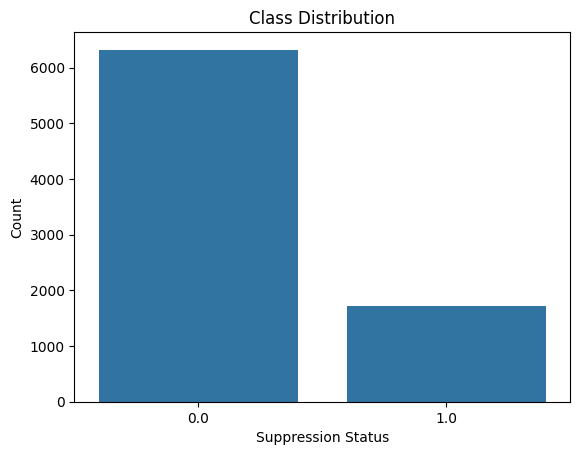

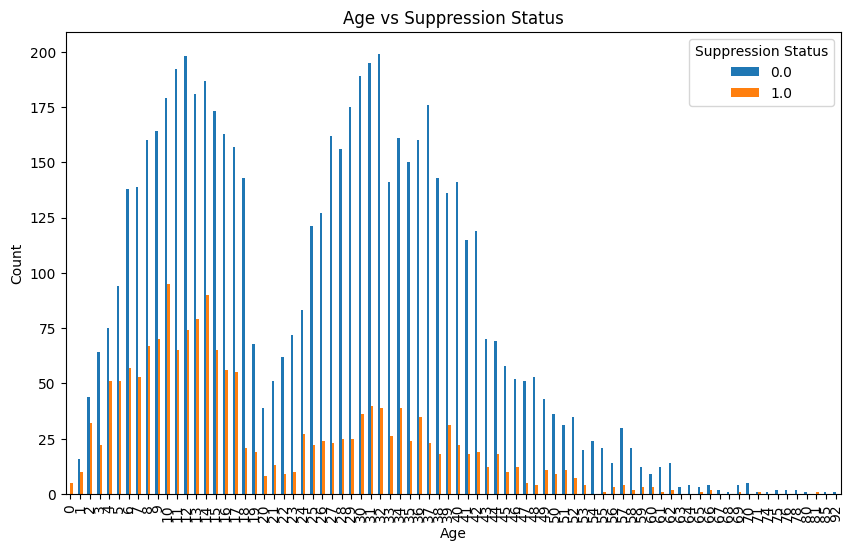

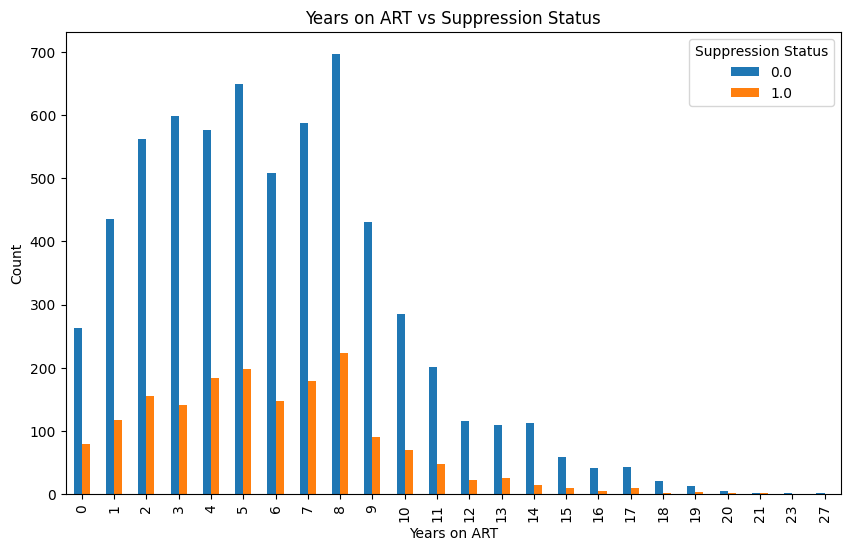

SVC(class_weight='balanced', kernel='sigmoid', probability=True,
    random_state=42)

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Dataset
data = pd.read_csv('Data/Clean_Dataset.csv')
print(data)


#Data Distribution
# Count of each class in the target variable
print(data['Suppression Status'].value_counts())

# Plot class distribution
sns.countplot(x='Suppression Status', data=data)
plt.title('Class Distribution')
plt.xlabel('Suppression Status')
plt.ylabel('Count')
plt.show()

# Relationship between weight and suppression status
pd.crosstab(data['Age'], data['Suppression Status']).plot(kind='bar', figsize=(10, 6))
plt.title('Age vs Suppression Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Relationship between weight and suppression status
pd.crosstab(data['Years on ART'], data['Suppression Status']).plot(kind='bar', figsize=(10, 6))
plt.title('Years on ART vs Suppression Status')
plt.xlabel('Years on ART')
plt.ylabel('Count')
plt.show()

# Choosing Age, Weight and Years on ART as the features
X = data[['Age', 'Weight', 'Years on ART']]
y = data['Suppression Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train the SVM classifier with an sigmoid kernel
svm_model = SVC(kernel='sigmoid', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

In [2]:
#Model Evaluation
# Prediction using the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 51.21%
